In [4]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
DATADIR = 'E:\Face Mask Dataset'
TRAIN_DATADIR = os.path.join(DATADIR, 'Train')
VALID_DATADIR = os.path.join(DATADIR, 'Validation')
TEST_DATADIR = os.path.join(DATADIR, 'Test')

In [6]:
CATEGORIES = []
for c in os.listdir(TRAIN_DATADIR):
    CATEGORIES.append(c)
print (CATEGORIES)        

['WithMask', 'WithoutMask']


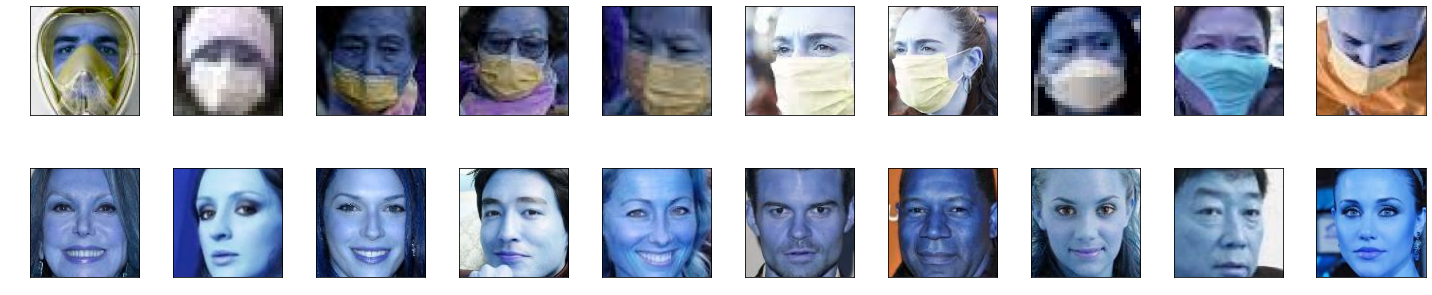

In [7]:
plt.figure(figsize=(20,5))
tmp=0
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, c)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img))
        plt.subplot(2,10,tmp+1)        
        plt.imshow(img_arr)
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(c, color='white',fontsize=20)
        tmp+=1
        if tmp%10==0:
            break
plt.tight_layout()
plt.show()        

In [8]:
train_data = []
validation_data = []
test_data = []
IMG_SIZE = 227

In [9]:
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            train_data.append([img_resized, class_num])
        except Exception as e:
            pass
print(len(train_data))

100%|██████████| 5000/5000 [00:24<00:00, 207.75it/s]

10000


In [10]:
for c in CATEGORIES:
    path = os.path.join(VALID_DATADIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            validation_data.append([img_resized, class_num])
        except Exception as e:
            pass
print(len(validation_data))

100%|██████████| 400/400 [00:03<00:00, 117.95it/s]

800


In [11]:
for c in CATEGORIES:
    path = os.path.join(TEST_DATADIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass
print(len(test_data))

100%|██████████| 509/509 [00:02<00:00, 189.87it/s]

992


In [ ]:
random.shuffle(train_data)
random.shuffle(validation_data)
random.shuffle(test_data)

In [ ]:
X_train = []
Y_train = []
for img, label in train_data:
    X_train.append(img)
    Y_train.append(label)
X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_train = np.array(Y_train)
print(X_train.shape, Y_train.shape)


In [ ]:
X_validation = []
Y_validation = []
for img, label in validation_data:
    X_validation.append(img)
    Y_validation.append(label)
X_validation = np.array(X_validation).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_validation = np.array(Y_validation)
print(X_validation.shape, Y_validation.shape)

In [ ]:
X_test = []
Y_test = []
for img, label in test_data:
    X_test.append(img)
    Y_test.append(label)
X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)
print(X_test.shape, Y_test.shape)

In [ ]:
import pickle

In [ ]:
p = open('./X_train.pickle','wb')
pickle.dump(X_train, p)
p.close()

In [ ]:
p = open('./Y_train.pickle','wb')
pickle.dump(Y_train, p)
p.close()

In [ ]:
p = open('./X_validation.pickle','wb')
pickle.dump(X_validation, p)
p.close()